In [1]:
!pip install geopandas rioxarray xarray rasterio earthpy shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 65.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 54.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 76.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 88.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 81.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 11.4 MB/s eta 0:00:00
 

In [2]:
from glob import glob
import os 
import numpy as np 
import numpy.ma as ma 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import rioxarray as rxr 
import xarray as xr 
from rasterio.plot import plotting_extent
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep 
from shapely.geometry import box

In [3]:
data = et.data.get_data("cold-springs-fire")
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

Extracted output to /home/codespace/earth-analytics/data/cold-springs-fire/.


In [4]:
modis_bands_pre_list = glob(os.path.join("cold-springs-fire", "modis", "reflectance", "07_july_2016", "crop", "*_sur_refl_b*.tif"))
modis_bands_pre_list

['cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b04_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b03_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b05_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b07_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b01_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b02_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b06_1.tif']

In [5]:
modis_bands_pre_list.sort()
modis_bands_pre_list

['cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b01_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b02_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b03_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b04_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b05_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b06_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b07_1.tif']

In [6]:
def combine_tifs(tif_list):
    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1
    
    return xr.concat(out_xr, dim="band")

In [7]:
help(combine_tifs)

Help on function combine_tifs in module __main__:

combine_tifs(tif_list)



In [8]:
modis_bands_pre = combine_tifs(modis_bands_pre_list)

modis_bands_pre

<xarray.DataArray (band: 7, y: 2400, x: 2400)> Size: 161MB
array([[[1902., 1949., 1947., ..., 1327., 1327., 1181.],
        [1949., 2160., 2095., ..., 1327., 1273., 1273.],
        [2054., 2156., 2187., ..., 1139., 1101., 1206.],
        ...,
        [1387., 1469., 1469., ...,  343.,  499., 1006.],
        [1298., 1316., 1469., ...,  905.,  499.,  436.],
        [1316., 1316., 1454., ...,  905.,  578.,  351.]],

       [[2714., 2859., 3041., ..., 3046., 3046., 4421.],
        [2968., 3362., 3253., ..., 3046., 4550., 4550.],
        [3198., 3315., 3246., ..., 4178., 4017., 3992.],
        ...,
        [2911., 2947., 2947., ..., 4059., 4907., 3799.],
        [2954., 2890., 2947., ..., 4517., 4907., 3459.],
        [2890., 2890., 2935., ..., 4517., 3728., 4021.]],

       [[1056., 1072., 1012., ...,  745.,  745.,  581.],
        [1051., 1150., 1039., ...,  745.,  595.,  595.],
        [1073., 1220., 1152., ...,  588.,  564.,  563.],
        ...,
...
        ...,
        [3650., 3384., 3384., ..., 3042., 3937., 3475.],
        [3602., 3320., 3384., ..., 4048., 3937., 3213.],
        [3320., 3320., 3625., ..., 4048., 3413., 3480.]],

       [[3330., 3560., 3449., ..., 3553., 3553., 3124.],
        [3381., 3449., 3563., ..., 3553., 3058., 3058.],
        [3316., 3144., 3383., ..., 3363., 3351., 2947.],
        ...,
        [3263., 3422., 3422., ..., 1745., 2048., 2555.],
        [3163., 3269., 3422., ..., 2345., 2048., 1972.],
        [3269., 3269., 3315., ..., 2345., 2241., 1820.]],

       [[2781., 2692., 2801., ..., 2260., 2260., 1534.],
        [2792., 2705., 2684., ..., 2260., 1449., 1449.],
        [2747., 2754., 2733., ..., 1713., 1802., 1548.],
        ...,
        [2457., 2446., 2446., ...,  444.,  832., 1379.],
        [2289., 2296., 2446., ..., 1161.,  832.,  762.],
        [2296., 2296., 2511., ..., 1161.,  913.,  703.]]], dtype=float32)
Coordinates:
  * band         (band) int64 56B 1 2 3 4 5 6 7
  * x            (x) float64 19kB -1.001e+07 -1.001e+07 ... -8.896e+06
  * y            (y) float64 19kB 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 8B 0
Attributes: (12/150)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    add_offset:                          0.0
    add_offset_err:                      0
    AREA_OR_POINT:                       Area
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ...                                  ...
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM
    STATISTICS_MAXIMUM:                  9851
    STATISTICS_MEAN:                     1376.7562105719
    STATISTICS_MINIMUM:                  -100
    STATISTICS_STDDEV:                   813.32838833907

/home/codespace/.python/current/lib/python3.10/site-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


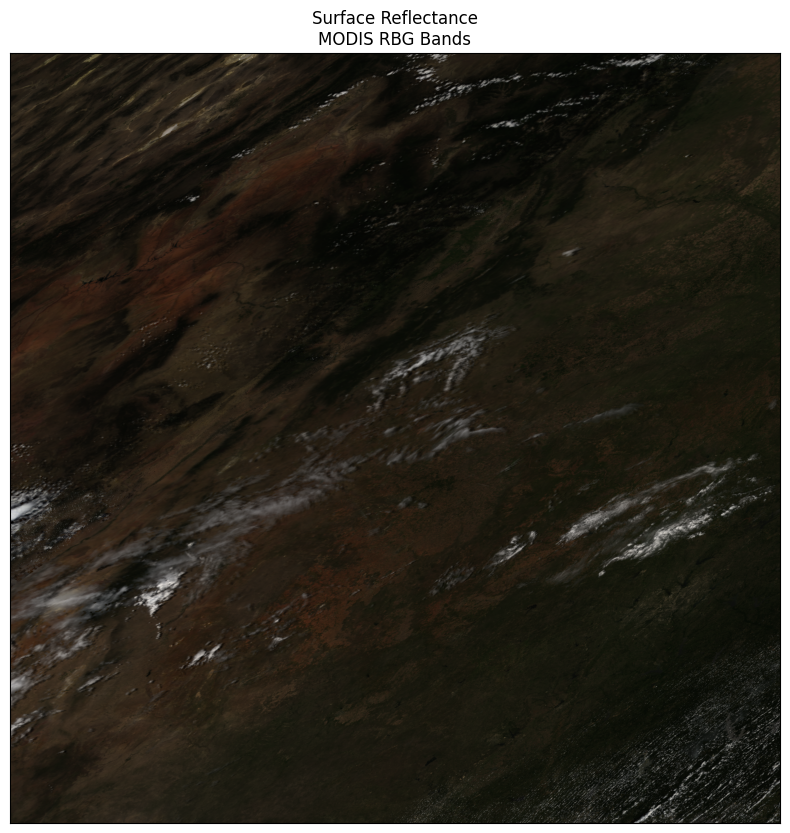

In [9]:
ep.plot_rgb(modis_bands_pre.values, rgb=[0, 3, 2], title="Surface Reflectance\nMODIS RBG Bands")
plt.show()

In [10]:
print(modis_bands_pre[1].min(), modis_bands_pre[1].max())

<xarray.DataArray ()> Size: 4B
array(-100., dtype=float32)
Coordinates:
    band         int64 8B 2
    spatial_ref  int64 8B 0 <xarray.DataArray ()> Size: 4B
array(10039., dtype=float32)
Coordinates:
    band         int64 8B 2
    spatial_ref  int64 8B 0


In [11]:
fire_boundary_path = os.path.join("cold-springs-fire", "vector_layers", "fire-boundary-geomac", "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

fire_bound_sin = fire_boundary.to_crs(modis_bands_pre.rio.crs)

fire_bound_box = [box(*fire_bound_sin.total_bounds)]

In [12]:
modis_clip_geometry = modis_bands_pre.rio.clip(fire_bound_sin.geometry, all_touched=True, from_disk=True)

modis_clip = modis_bands_pre.rio.clip(fire_bound_box, all_touched=True, from_disk=True)

/home/codespace/.python/current/lib/python3.10/site-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


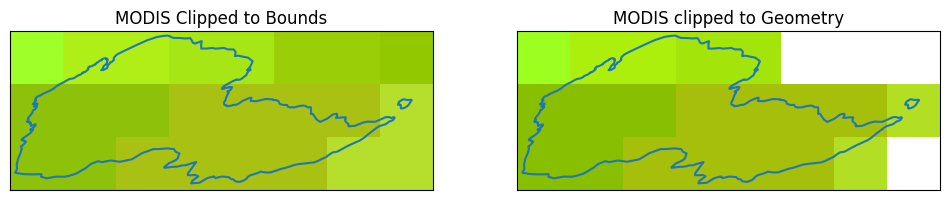

In [13]:
extent = plotting_extent(modis_clip[0].values, modis_clip.rio.transform())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 15))

ep.plot_rgb(modis_clip.values, rgb=[0,3,2], ax=ax1, extent=extent, title="MODIS Clipped to Bounds")

fire_bound_sin.boundary.plot(ax=ax1)

ep.plot_rgb(modis_clip_geometry.values, rgb=[0,3,2], ax=ax2, extent=extent, title="MODIS clipped to Geometry")

fire_bound_sin.boundary.plot(ax=ax2)

plt.show()

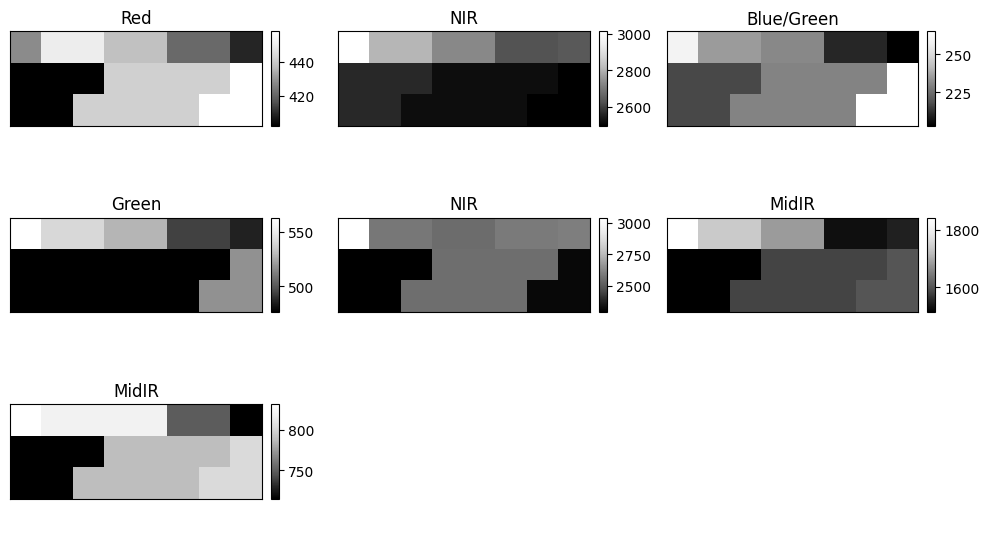

In [14]:
titles = ["Red", "NIR", "Blue/Green", "Green", "NIR", "MidIR", "MidIR"]

ep.plot_bands(modis_clip, cols=3, title=titles, figsize=(10, 6))

plt.show()

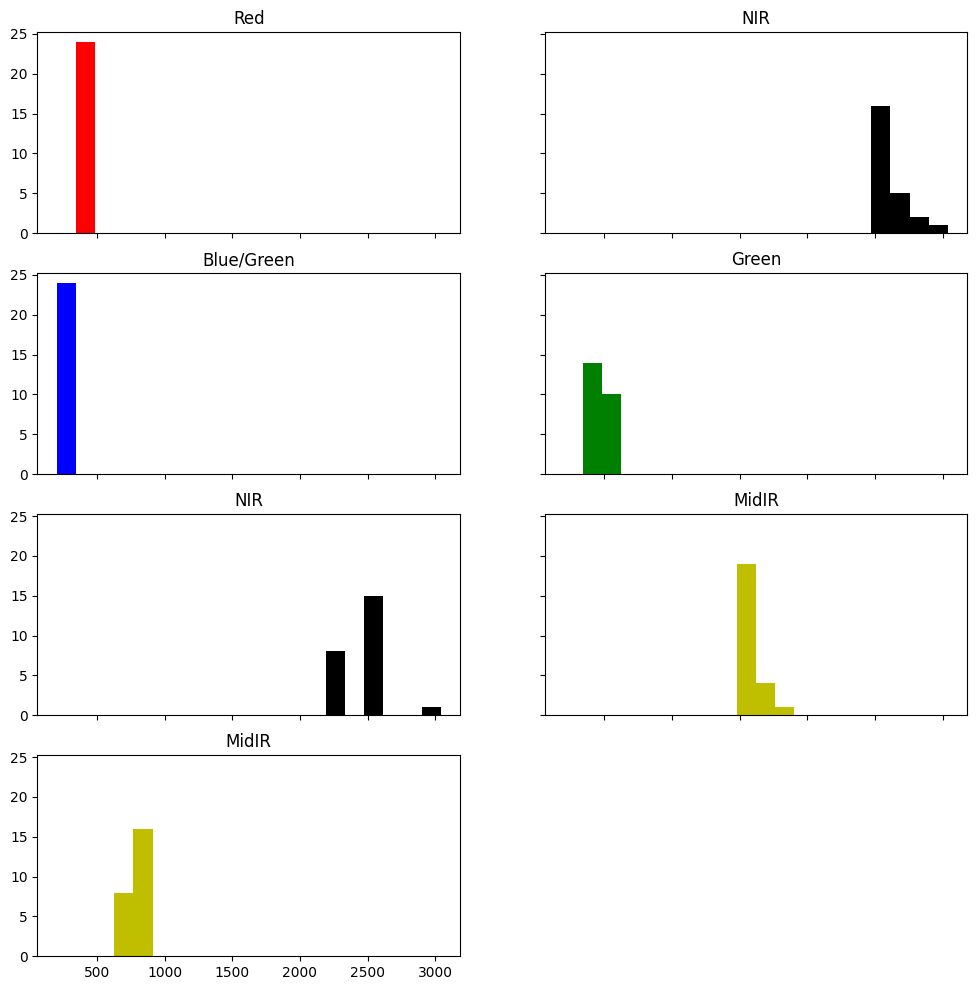

In [15]:
colors = ["r", "k", "b", "g", "k", "y", "y"]
titles = ["Red", "NIR", "Blue/Green", "Green", "NIR", "MidIR", "MidIR"]

ep.hist(modis_clip.values, colors=colors, title=titles, cols=2)
plt.show()

In [16]:
modis_bands_pre_scaled = modis_clip * 0.0001

In [17]:
modis_bands_pre_scaled[1].min()

<xarray.DataArray ()> Size: 4B
array(0.2496, dtype=float32)
Coordinates:
    band         int64 8B 2
    spatial_ref  int64 8B 0

In [18]:
modis_bands_pre_scaled[1].max()

<xarray.DataArray ()> Size: 4B
array(0.3013, dtype=float32)
Coordinates:
    band         int64 8B 2
    spatial_ref  int64 8B 0

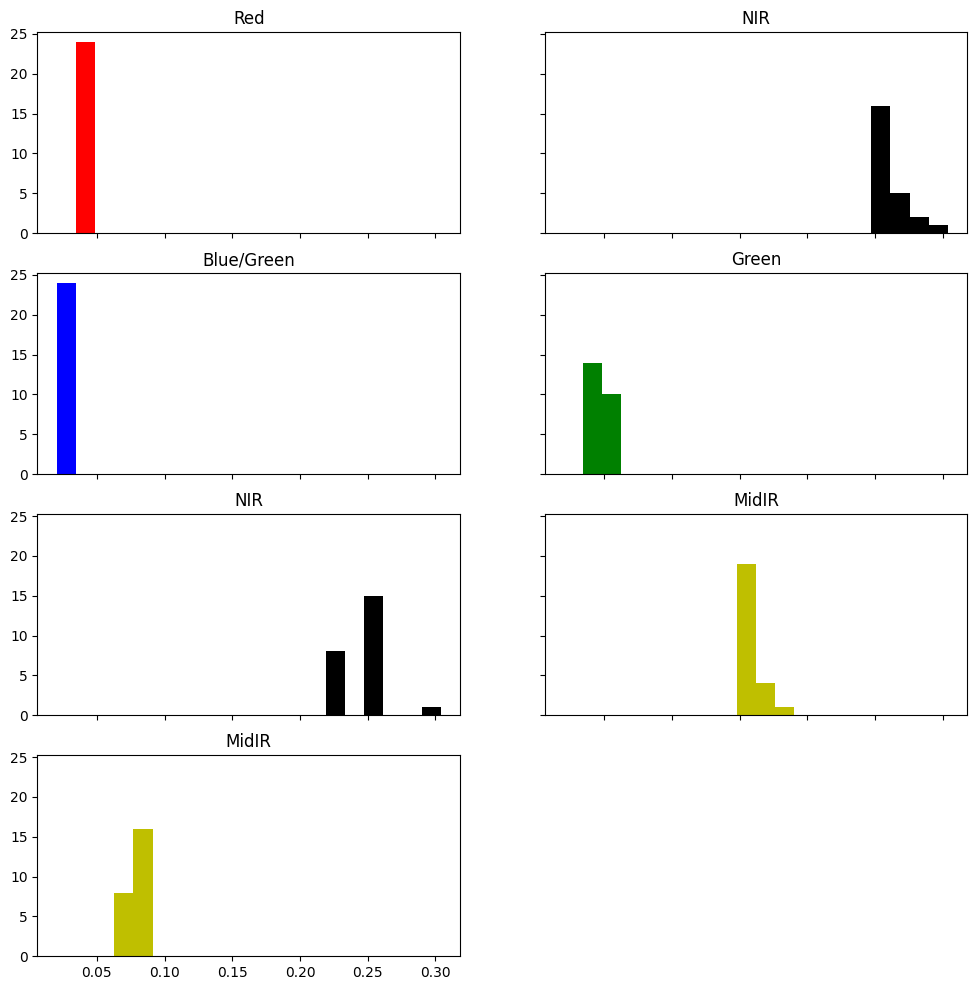

In [19]:
ep.hist(modis_bands_pre_scaled.values, colors=colors, title=titles, cols=2)
plt.show()